# Install Libraries

In [ ]:
# Based on https://huggingface.co/learn/cookbook/en/agents

In [1]:
!pip install smolagents datasets langchain sentence-transformers faiss-cpu duckduckgo-search langchain-community

# Import Libraries

In [2]:
from smolagents import load_tool, CodeAgent, HfApiModel, DuckDuckGoSearchTool

In [3]:
from huggingface_hub import notebook_login

# Login to Huggingface

In [4]:
notebook_login()

# Setup Agent

## Import Tools

In [5]:
image_generation_tool = load_tool("m-ric/text-to-image", trust_remote_code=True)

TOOL CODE:
 from smolagents import Tool
from huggingface_hub import InferenceClient


class TextToImageTool(Tool):
    description = "This tool creates an image according to a prompt, which is a text description."
    name = "image_generator"
    inputs = {"prompt": {"type": "string", "description": "The image generator prompt. Don't hesitate to add details in the prompt to make the image look better, like 'high-res, photorealistic', etc."}}
    output_type = "image"
    model_sdxl = "black-forest-labs/FLUX.1-schnell"
    client = InferenceClient(model_sdxl)


    def forward(self, prompt):
        return self.client.text_to_image(prompt)



In [6]:
search_tool = DuckDuckGoSearchTool()

llm_engine = HfApiModel("Qwen/Qwen2.5-72B-Instruct")

## Initialize the agent with both tools

In [7]:
agent = CodeAgent(tools=[image_generation_tool, search_tool], model=llm_engine)

# Execute Agent

In [8]:
result = agent.run(
    "Generate me a photo of the car that James bond drove in the latest movie.",
)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate me a photo of the car that James bond drove in the latest movie.                                       │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-72B-Instruct ────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  latest_movie_info = web_search(query="latest James Bond movie and the car")                                      
  print(latest_movie_info)                                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
## Search Results

[All of the Bond cars of 'No Time To Die' (caution for 
spoilers)](https://www.autoblog.com/features/no-time-to-die-james-bond-cars)
In short, though, the cars of Daniel Craig's last Bond film don't disappoint, and neither do the stunts. There is 
plenty for car enthusiasts to ogle at when No Time To Die opens in theaters on ...

[No Time To Die: The cars of the new James Bond film - 
Driving.co.uk](https://www.driving.co.uk/news/diversions/no-time-die-cars-james-bond-film/)
NO TIME TO DIE, the 25th film in the James Bond franchise, and the final one starring Daniel Craig as 007, has 
arrived after long delays due to the coronavirus pandemic.. Here we profile the cars from Aston Martin, Land Rover,
Maserati and Toyota that appear in the spotlight. 1. Aston Martin DB5. It's arguably the most famous film car of 
all time, and Bond's silver Aston Martin DB5 is back ...

[No Time To Die: nine cars (and one bike) from the new James Bond 
movie](https://www.topgear.com/car-news/movies/no-time-die-nine-cars-and-one-bike-new-james-bond-movie)
The new James Bond spectacle entitled No Time To Die features something called a 'DB5'. Apparently, it was a car a 
British company that goes by the name 'Aston Martin' was building back in ...

[The cars and chase scenes of "No Time To Die" - Motor 
Authority](https://www.motorauthority.com/news/1133801_the-cars-and-chase-scenes-of-no-time-to-die)
Kirk Bell October 9, 2021 Comment Now! A new James Bond film, "No Time To Die," is hitting the theaters, and for 
car guys that means cool cars become the stars as much as the glitzy Hollywood ...

[James Bond: Every Car Appearing In No Time To Die - Screen 
Rant](https://screenrant.com/james-bond-no-time-die-movie-cars/)
The No Time To Die trailer includes a brief glimpse of Bond whipping a sheet off what appears to be the Aston 
Martin V8 Vantage, as driven by Timothy Dalton in The Living Daylights.The Aston Martin website actually only lists
the V8 Saloon, similar to the Dalton-era model in many aspects. Nevertheless, the number plates are the same, 
implying that the Craig's V8 is intended to be the car from ...

[Aston Martin Cars Featured in James Bond Film, No Time to 
Die](https://www.astonmartinpalmbeach.com/james-bond-aston-martin-no-time-to-die/)
James Bond DB5 Car Chase Scene Highlights in No Time to Die. 10 Aston Martin DB5s were used in No Time to Die—2 
actual models and 8 replicas.The replicas of these classic 60s Aston Martin James Bond cars were enhanced with 
6-cylinder engines with more than 380 hp, as well as a carbon fiber chassis, roll cages, limited-rear slip 
differentials, the latest safety systems, and more to ensure ...

[Jaguar Xf Makes Its 007 Debut in No Time to 
Die](https://media.jaguar.com/news/2021/10/jaguar-xf-makes-its-007-debut-no-time-die)
Dynamic debut: The Jaguar XF is set to make its debut as the perfect chase car in new James Bond film No Time To 
Die, released in the UK on September 30 2021 Precision driving: Renowned for its unrivalled blend of ride, handling
and refinement, the XF was put through its paces in pursuit of James Bond on the streets of southern Italy in the 
twenty‑fifth 007 film

[These 4 Aston Martin Cars Are Featured in the Next 'James Bond' Film 
...](https://www.mensjournal.com/gear/bond-25-these-4-aston-martin-cars-are-featured-in-no-time-to-die)
The next Bond film will feature classic cars like the Aston Martin DB5 and the V8 Vantage, as well as new DBS 
Superleggera and Aston Martin Valhalla. The DB5 was the first Aston Martin featured in ...

[Aston Martin Reveals Which of Its Models Appear in New James Bond Film 
...](https://www.newsweek.com/aston-martin-reveals-which-its-models-appear-new-james-bond-film-no-time-die-1624537)
Aston Martin DBX Makes Co-Stars in New 4-Minute Film The classic Aston Martin V8 is a British muscle car that was 
produced from 1969 to 1989. Each of the models was hand-built, taking 1,200 hours ...

[These are All the Cars i

[Step 0: Duration 7.21 seconds| Input tokens: 2,162 | Output tokens: 86]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image = image_generator(prompt="A photorealistic image of the 1964 Aston Martin DB5, driven by James Bond in     
  the movie No Time to Die.")                                                                                      
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7E6B32DEED70>

[Step 1: Duration 32.86 seconds| Input tokens: 5,654 | Output tokens: 186]

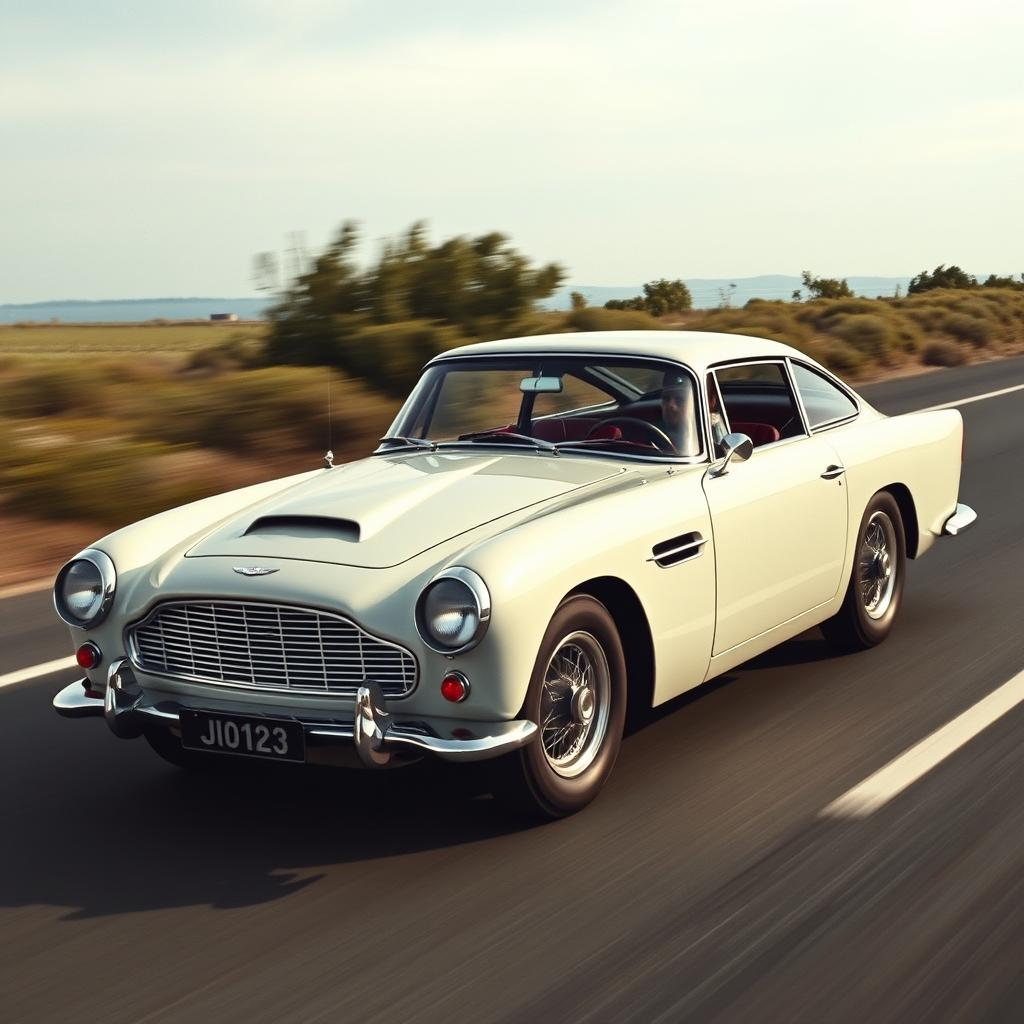

In [9]:
result